# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Url for weather map call
api_key = '31a5edb8cbdf1346e3bb321a92497c38'

testing_city = cities[0]

dataset = requests.get(f'http://api.openweathermap.org/data/2.5/weather?q={testing_city}&appid={api_key}').json()

In [4]:
dataset['coord']

{'lon': -50.21, 'lat': -30.18}

In [5]:
#Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
#Perform a weather check on each of the cities using a series of successive API calls.
#Include a print log of each city as it's being processed with the city number and city name.

In [30]:
city_data = []

print('-----------------')
print('Beginning Data Retrieval')
print('------------------')

for idx,city in enumerate(cities):
    try:
        
        print(f'now printing city number:{idx},city name:{city}')
    
        data = requests.get(f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}').json()

        city_lat = data["coord"]["lat"]
        city_lng = data["coord"]["lon"]
        city_max_temp = data["main"]["temp_max"]
        city_humidity = data["main"]["humidity"]
        city_clouds = data["clouds"]["all"]
        city_wind = data["wind"]["speed"]
        city_country = data["sys"]["country"]
        city_date = data["dt"]

        city_data.append({"City": city,
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})  
    except: 
        print("City not found")

-----------------
Beginning Data Retrieval
------------------
now printing city number:0,city name:cidreira
now printing city number:1,city name:yaan
now printing city number:2,city name:punta arenas
now printing city number:3,city name:esperance
now printing city number:4,city name:geraldton
now printing city number:5,city name:east london
now printing city number:6,city name:taolanaro
City not found
now printing city number:7,city name:albany
now printing city number:8,city name:khatanga
now printing city number:9,city name:bronnoysund
now printing city number:10,city name:leningradskiy
now printing city number:11,city name:ulaanbaatar
now printing city number:12,city name:mataura
now printing city number:13,city name:vaitupu
City not found
now printing city number:14,city name:busselton
now printing city number:15,city name:talara
now printing city number:16,city name:yellowknife
now printing city number:17,city name:road town
now printing city number:18,city name:belushya guba
City

now printing city number:167,city name:balimo
City not found
now printing city number:168,city name:bethel
now printing city number:169,city name:iwanai
now printing city number:170,city name:talnakh
now printing city number:171,city name:lexington park
now printing city number:172,city name:sale
now printing city number:173,city name:kazalinsk
City not found
now printing city number:174,city name:kazachinskoye
now printing city number:175,city name:rawlins
now printing city number:176,city name:solovetskiy
City not found
now printing city number:177,city name:katsuura
now printing city number:178,city name:tereze
now printing city number:179,city name:itarantim
now printing city number:180,city name:tual
now printing city number:181,city name:san matias
now printing city number:182,city name:tuy hoa
now printing city number:183,city name:kirakira
now printing city number:184,city name:san ramon
now printing city number:185,city name:jiwani
now printing city number:186,city name:kahulu

now printing city number:331,city name:mamallapuram
now printing city number:332,city name:nelson bay
now printing city number:333,city name:fukue
now printing city number:334,city name:zonguldak
now printing city number:335,city name:thinadhoo
now printing city number:336,city name:mandalgovi
now printing city number:337,city name:turukhansk
now printing city number:338,city name:beringovskiy
now printing city number:339,city name:richards bay
now printing city number:340,city name:biak
now printing city number:341,city name:toliary
City not found
now printing city number:342,city name:kavieng
now printing city number:343,city name:moose factory
now printing city number:344,city name:khandyga
now printing city number:345,city name:chebsara
now printing city number:346,city name:grand gaube
now printing city number:347,city name:taraz
now printing city number:348,city name:coquimbo
now printing city number:349,city name:bokspits
City not found
now printing city number:350,city name:mar

now printing city number:496,city name:sri aman
now printing city number:497,city name:guerrero negro
now printing city number:498,city name:ruatoria
City not found
now printing city number:499,city name:talavera
now printing city number:500,city name:bud
now printing city number:501,city name:denpasar
now printing city number:502,city name:umm kaddadah
now printing city number:503,city name:matagami
now printing city number:504,city name:boyle
now printing city number:505,city name:kununurra
now printing city number:506,city name:pirovskoye
now printing city number:507,city name:chicama
now printing city number:508,city name:nara
now printing city number:509,city name:puerto madryn
now printing city number:510,city name:pendleton
now printing city number:511,city name:kamenskoye
City not found
now printing city number:512,city name:vitry-le-francois
now printing city number:513,city name:talas
now printing city number:514,city name:jian
now printing city number:515,city name:dallas
no

In [7]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cidreira,-30.18,-50.21,296.47,73,63,4.58,BR,1587926125
1,yaan,7.38,8.57,302.76,61,81,2.67,NG,1587926125
2,punta arenas,-53.15,-70.92,282.15,57,22,7.20,CL,1587926045
3,esperance,-33.87,121.90,285.15,81,4,5.70,AU,1587926126
4,geraldton,-28.77,114.60,292.15,68,100,3.60,AU,1587925868


In [23]:
city_data_df.to_csv('city_data.csv')
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cidreira,-30.18,-50.21,296.47,73,63,4.58,BR,1587926125
1,yaan,7.38,8.57,302.76,61,81,2.67,NG,1587926125
2,punta arenas,-53.15,-70.92,282.15,57,22,7.20,CL,1587926045
3,esperance,-33.87,121.90,285.15,81,4,5.70,AU,1587926126
4,geraldton,-28.77,114.60,292.15,68,100,3.60,AU,1587925868


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
#Load csv file and create new DataFrame
df_csv = pd.read_csv('city_data.csv', index_col=0)
df_csv.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cidreira,-30.18,-50.21,296.47,73,63,4.58,BR,1587926125
1,yaan,7.38,8.57,302.76,61,81,2.67,NG,1587926125
2,punta arenas,-53.15,-70.92,282.15,57,22,7.20,CL,1587926045
3,esperance,-33.87,121.90,285.15,81,4,5.70,AU,1587926126
4,geraldton,-28.77,114.60,292.15,68,100,3.60,AU,1587925868


In [26]:
df_csv.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       560
Date          563
dtype: int64

In [41]:
from datetime import datetime

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

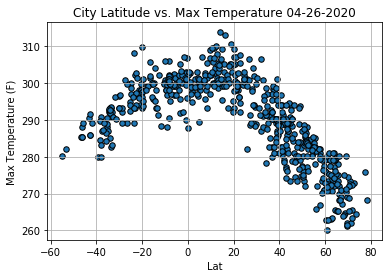

In [61]:
#Plot latitude vs temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'],marker='o', s=30, edgecolors= "black")
plt.xlabel('Lat')
plt.ylabel('Max Temperature (F)')
plt.grid(True)
title_dt = datetime.fromtimestamp(city_data_df.loc[0,"Date"]).strftime('%m-%d-%Y')
plt.title(f'City Latitude vs. Max Temperature {title_dt}')

plt.savefig("Lat vs Temp.png")

#### Latitude vs. Humidity Plot

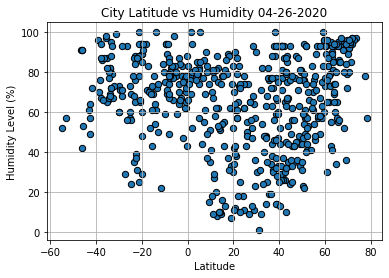

In [56]:
#create a Scatter Plot for Lattitude vs Humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker='o', s=40, edgecolors= "black")
title_dt = datetime.fromtimestamp(city_data_df.loc[0,"Date"]).strftime('%m-%d-%Y')
plt.title(f'City Latitude vs Humidity {title_dt}')
plt.ylabel("Humidity Level (%)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("Lat vs Humidity.png")

#### Latitude vs. Cloudiness Plot

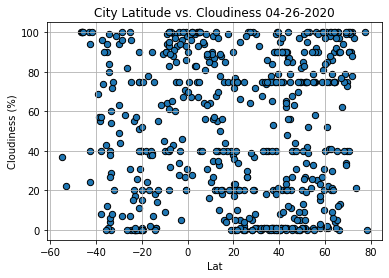

In [57]:
#Plot latitude vs cloudiness and save as .png
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'],marker='o', s=40, edgecolors= "black")
title_dt = datetime.fromtimestamp(city_data_df.loc[0,"Date"]).strftime('%m-%d-%Y')
plt.title(f'City Latitude vs. Cloudiness {title_dt}')
plt.xlabel('Lat')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.savefig("Lat vs Cloudiness.png")


#### Latitude vs. Wind Speed Plot

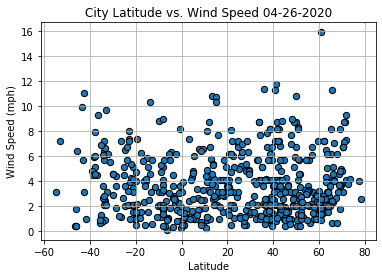

In [58]:
#Plot latitude vs wind speed 
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'],marker='o', s=40, edgecolors= "black")
title_dt = datetime.fromtimestamp(city_data_df.loc[0,"Date"]).strftime('%m-%d-%Y')
plt.title(f'City Latitude vs. Wind Speed {title_dt}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.savefig("Lat vs wind.png")